In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('aqua_data.xlsx',header=0)

In [3]:
df

,Date,Total effluent volume,Average effluent flow rate,Average pH,Average Temperature,Average TOC (some measures per month),COD single value,BTEX single value,NO3 single value,PO4 single value,SO4 calc value,H2O2
0,2015-01-01,6274.436688,8.433383,2.473274,19.491709,288,2100.0,0.02,1298.0,0.78,630.310040,0.2
1,2015-02-01,6536.414160,9.726807,2.290511,18.344463,208,1800.0,< 0.01,748.0,0.52,527.710033,0.4
2,2015-03-01,8573.405380,11.523394,2.290511,20.783849,217,3100.0,0.02,827.0,0.90,458.045461,0.3
3,2015-04-01,9013.163461,12.518283,2.290511,23.517036,200,2300.0,0.01,711.0,0.97,407.200757,<0.1
4,2015-05-01,7161.491611,9.625661,2.290511,27.368973,164,6950.0,0.01,974.0,3.94,551.822709,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-08-01,3762.150270,5.056654,2.290511,28.712239,90,NaN,<0.01,NaN,NaN,386.606373,NaN
68,2020-09-01,6249.347203,8.679649,2.290511,28.134658,192,1300.0,0.02,985.0,0.82,538.909765,<0.1
69,2020-10-01,7514.517235,10.100158,2.290511,23.455715,223,NaN,0.01,NaN,NaN,495.010513,NaN
70,2020-11-01,6638.278655,9.219831,2.290511,21.418823,231,NaN,<0.01,NaN,NaN,519.911846,NaN


In [33]:
def preprocess(df):
    df=df.drop(columns={'Date'})
    df['BTEX single value']=np.where((df['BTEX single value']=='<0.01')|(df['BTEX single value']=='< 0.01'),'0',df['BTEX single value'])
    
    df['H2O2']=np.where((df['H2O2']=='<0.1'),'0',df['H2O2'])
    df=df.astype(float).round(2)
    
    
    pdf=df.fillna(df.mean())
    pdf=pdf.astype(float).round(2)
    return pdf

In [34]:
pdf=preprocess(df)

In [36]:
pdf

,Total effluent volume,Average effluent flow rate,Average pH,Average Temperature,Average TOC (some measures per month),COD single value,BTEX single value,NO3 single value,PO4 single value,SO4 calc value,H2O2
0,6274.44,8.43,2.47,19.49,288.0,2100.00,0.02,1298.00,0.78,630.31,0.20
1,6536.41,9.73,2.29,18.34,208.0,1800.00,0.00,748.00,0.52,527.71,0.40
2,8573.41,11.52,2.29,20.78,217.0,3100.00,0.02,827.00,0.90,458.05,0.30
3,9013.16,12.52,2.29,23.52,200.0,2300.00,0.01,711.00,0.97,407.20,0.00
4,7161.49,9.63,2.29,27.37,164.0,6950.00,0.01,974.00,3.94,551.82,0.20
...,...,...,...,...,...,...,...,...,...,...,...
67,3762.15,5.06,2.29,28.71,90.0,1765.94,0.00,915.67,2.14,386.61,0.13
68,6249.35,8.68,2.29,28.13,192.0,1300.00,0.02,985.00,0.82,538.91,0.00
69,7514.52,10.10,2.29,23.46,223.0,1765.94,0.01,915.67,2.14,495.01,0.13
70,6638.28,9.22,2.29,21.42,231.0,1765.94,0.00,915.67,2.14,519.91,0.13


## FILTER METHOD USING PEARSON CORRELATION

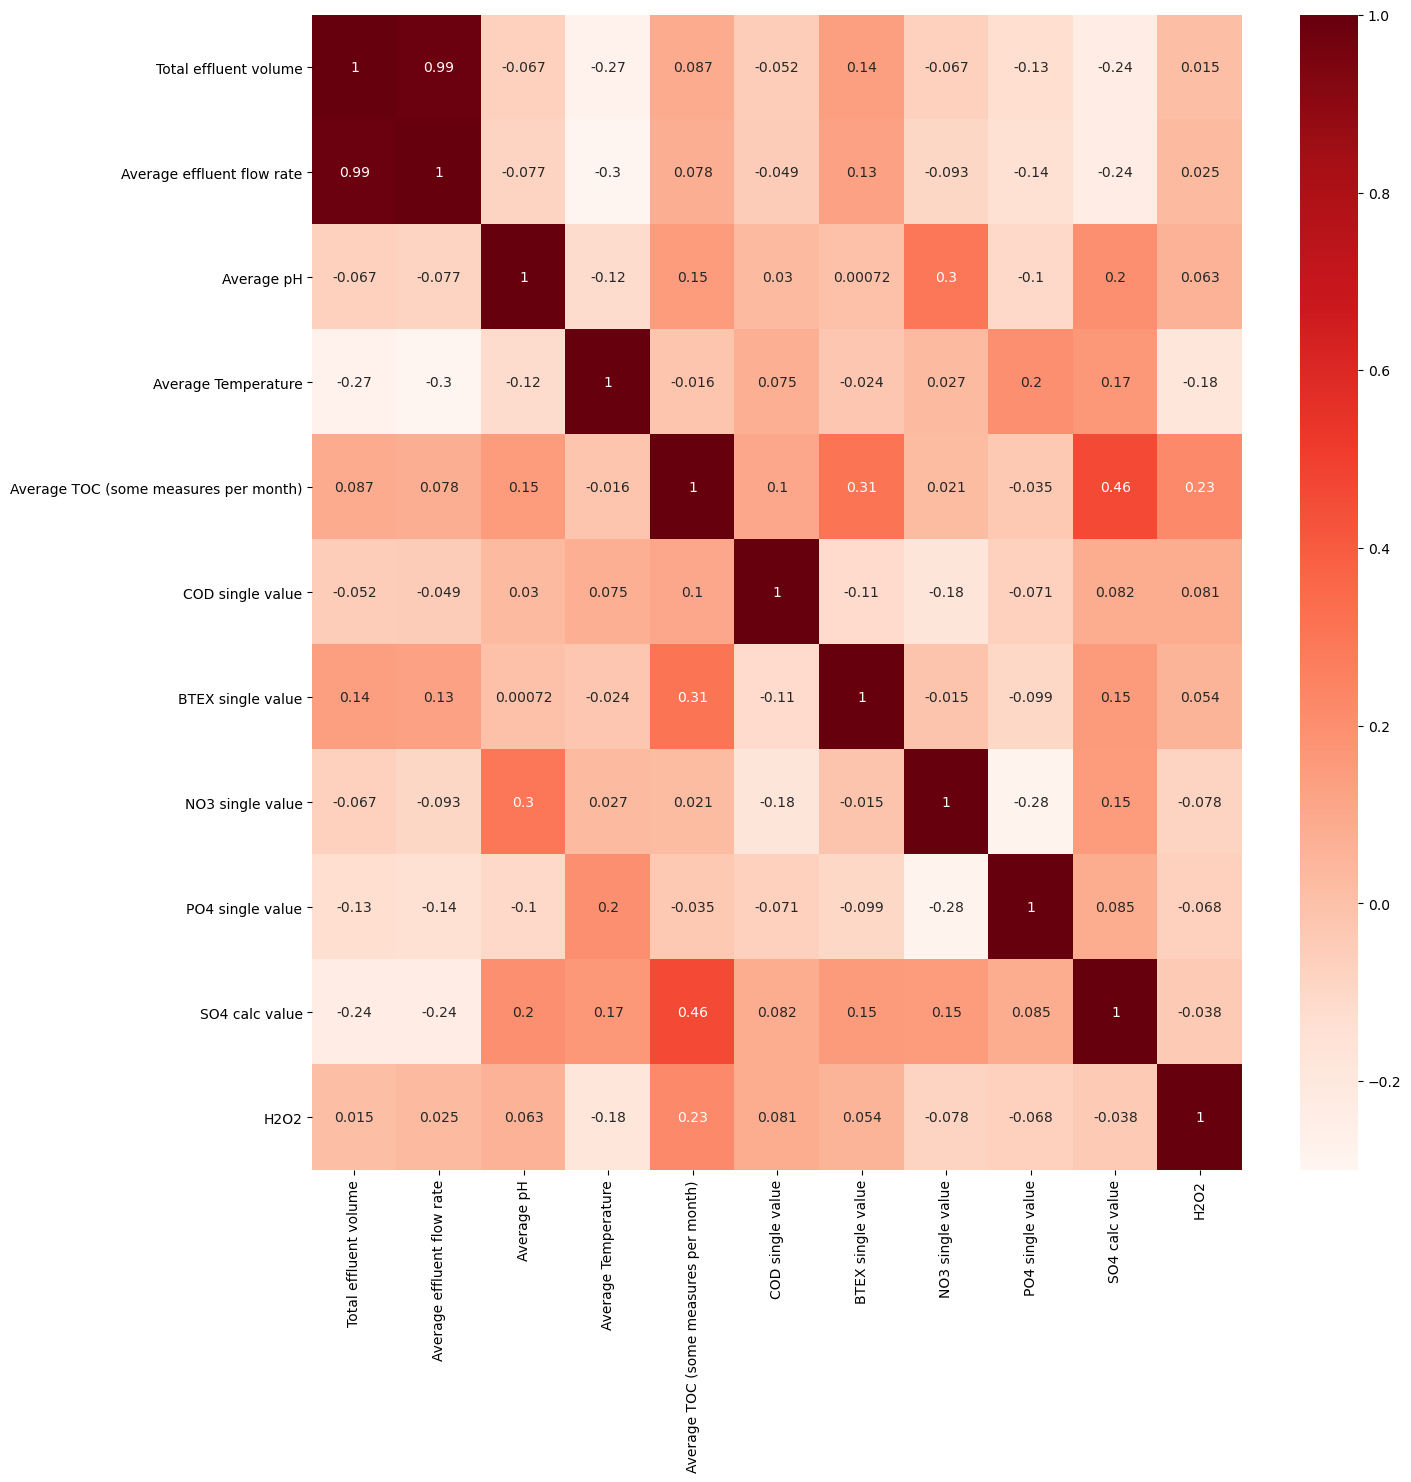

In [38]:
plt.figure(figsize=(15,15))
cor = pdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.savefig("pearson_corr.png")
plt.show()

In [39]:
from scipy import stats

In [40]:
corr_pval=pd.DataFrame(columns=['r','p'])

In [41]:
df2=pdf

## P-VALUES CALCULATION

In [42]:
for col in df2:
    
    r, p=stats.pearsonr(df2['Average pH'],df2[col])
    corr_pval.loc[col]=[round(r,3),round(p,3)]
corr_pval

,r,p
Total effluent volume,-0.067,0.579
Average effluent flow rate,-0.077,0.519
Average pH,1.000,0.000
Average Temperature,-0.121,0.311
Average TOC (some measures per month),0.150,0.207
COD single value,0.030,0.805
BTEX single value,0.001,0.995
NO3 single value,0.296,0.012
PO4 single value,-0.103,0.391
SO4 calc value,0.198,0.095


## DBSCAN CLUSTERING 

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [67]:
x = pdf.values

## Normalization using MinMax Scaler

In [68]:
scaler =MinMaxScaler()
scaled_x = scaler.fit_transform(x)

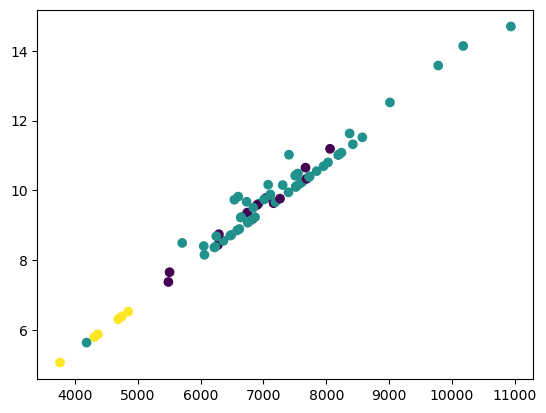

In [72]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(scaled_x) # define the model
labels_db_y = dbscan.labels_


plt.scatter(x[:,0],x[:,1],c=labels_db_y)
plt.savefig("./db_scan.png")
plt.show()

## DBSCAN Results 

In [ ]:
from pandas import DataFrame

In [107]:
DataFrame(labels_db_y).value_counts()

 0    53
-1    13
 1     6
dtype: int64

In [76]:
pdf['DBSCAN pred.']=DataFrame(labels_db_y)

In [77]:
pdf

,Total effluent volume,Average effluent flow rate,Average pH,Average Temperature,Average TOC (some measures per month),COD single value,BTEX single value,NO3 single value,PO4 single value,SO4 calc value,H2O2,DBSCAN pred.
0,6274.44,8.43,2.47,19.49,288.0,2100.00,0.02,1298.00,0.78,630.31,0.20,-1
1,6536.41,9.73,2.29,18.34,208.0,1800.00,0.00,748.00,0.52,527.71,0.40,0
2,8573.41,11.52,2.29,20.78,217.0,3100.00,0.02,827.00,0.90,458.05,0.30,0
3,9013.16,12.52,2.29,23.52,200.0,2300.00,0.01,711.00,0.97,407.20,0.00,0
4,7161.49,9.63,2.29,27.37,164.0,6950.00,0.01,974.00,3.94,551.82,0.20,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
67,3762.15,5.06,2.29,28.71,90.0,1765.94,0.00,915.67,2.14,386.61,0.13,1
68,6249.35,8.68,2.29,28.13,192.0,1300.00,0.02,985.00,0.82,538.91,0.00,0
69,7514.52,10.10,2.29,23.46,223.0,1765.94,0.01,915.67,2.14,495.01,0.13,0
70,6638.28,9.22,2.29,21.42,231.0,1765.94,0.00,915.67,2.14,519.91,0.13,0


## IMPLEMENTING PCA (TESTING) IN ORDER TO REDUCE THE NUM OF FEATURES

In [89]:
pca = PCA(n_components=2)

In [90]:
principalComponents = pca.fit_transform(scaled_x)

In [91]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [93]:
principalDf['DBSCAN pred.']=DataFrame(labels_db_y)

In [97]:
%matplotlib inline

## DISPLAY THE RESULTS 

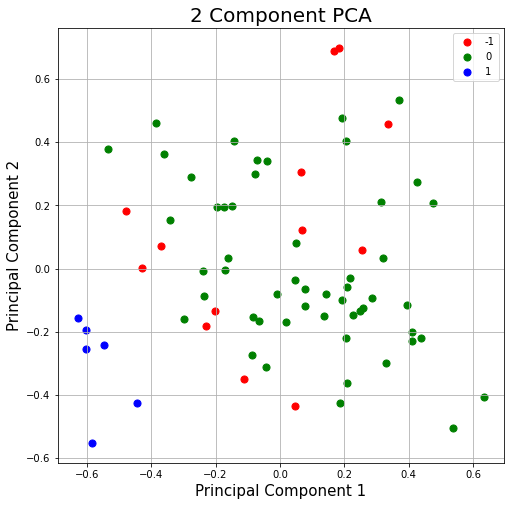

In [108]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [-1, 0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['DBSCAN pred.'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig("./pca.png")